In [1]:
#张晨阳 2016011664
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [12]:
data = load_iris()

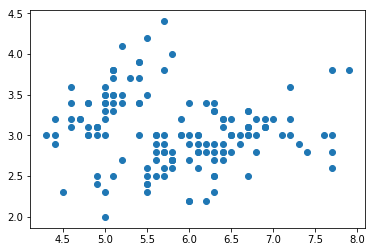

In [3]:
#将鸢尾花数据集画成图的形式。
x_point = data.data[:,0]
y_point = data.data[:,1]
plt.scatter(x_point,y_point)

In [4]:
#确定一个合适的阈值，只有两个样本之间的相似度大于该阈值时，这两个样本之间才有一条边。
w = []
o = 1/np.sqrt(2)
for i in data.data:
    
    for j in data.data:
        w.append(np.exp(-(np.linalg.norm(i - j)**2/(2*o*o))))

w = np.array(w)
mean = w.mean()
std = w.std()
thresold = mean+2*std

In [5]:
#求取带权邻接矩阵。
matrix = w.reshape(150,150)
matrix  = np.where(matrix<0.27,0,1)

In [6]:
#根据邻接矩阵进行聚类。马尔可夫
#得到归一化的随机游走矩阵
#对随机游走矩阵的每一行用k均值算法聚类
def dist_eculd(vecA,vecB):
    vec_square = []
    for element in vecA - vecB:
        element = element**2
        vec_square.append(element)
    return sum(vec_square)**0.5
def rand_cent(data_set,k):
    n = data_set.shape[1]
    centroids = np.zeros((k,n))
    for j in range(n):
        min_j = float(min(data_set[:,j]))
        range_j = float(max(data_set[:,j])) - min_j
        centroids[:,j] = (min_j + range_j * np.random.rand(k,1))[:,0]
    return centroids
def Kmeans(data_set , k):
    m = data_set.shape[0]
    cluster_assment = np.zeros((m,2))
    centroids = rand_cent(data_set , k)
    cluster_changed = True
    while cluster_changed:
        cluster_changed = False
        for i in range(m):
            min_dist = np.inf;min_index = -1
            for j in range(k):
                dist_ji = dist_eculd(centroids[j,:],data_set[i,:])
                if dist_ji <min_dist:
                    min_dist = dist_ji;min_index = j
            if cluster_assment[i,0]!= min_index:
                cluster_changed = True
            cluster_assment[i,:] = min_index,min_dist**2
        for cent in range(k):
            pts_inclust = data_set[np.nonzero(list(map(lambda x:x==cent, cluster_assment[:,0])))]
            centroids[cent,:] = np.mean(pts_inclust,axis = 0)
    return centroids, cluster_assment
x_normed = matrix/matrix.sum(axis = 0)
for i in range(18):
    x_normed = x_normed*x_normed
    x_normed =np.square(x_normed)
    x_normed = x_normed/x_normed.sum(axis = 0)
centorids,cluster_assment=Kmeans(x_normed,3) 

    

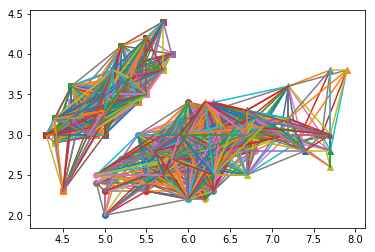

In [14]:
#将聚类结果可视化，重新转换成图的形式，其中每一个簇应该用一种形状表示，比如分别用圆圈、三角和矩阵表示各个簇。
target = cluster_assment[:,0]

for i in range(150):
    if target[i]==0:
        plt.scatter(data.data[i][0],data.data[i][1],marker = 'o')
    elif target[i] == 1:
        plt.scatter(data.data[i][0],data.data[i][1],marker = '^')
    else:
        plt.scatter(data.data[i][0],data.data[i][1],marker = 's')
for i in range(150):
    for j in range(i+1,150):
        if matrix[i][j] !=0:
            plt.plot([x_point[i],x_point[j]],[y_point[i],y_point[j]])

In [21]:
#求得分簇正确率,算法正确率自行根据鸢尾花数据集计算并输
count0=count1=count2=0
for i in range(150):
    if i<50:
        if target[i]==2:
            count0=count0+1
    elif i<100:
        if target[i]==0:
            count1=count1+1
        else:
            count2=count2+1
print("聚类的正确率是：")
print((count0+count1+count2)/150)
            

聚类的正确率是：
0.6666666666666666
